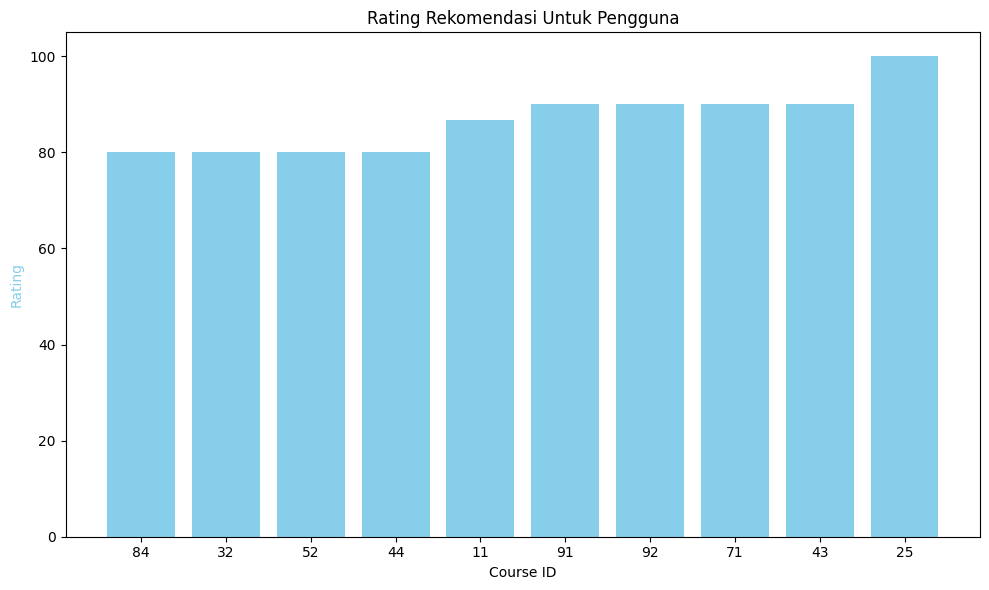

In [25]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import Reader
import matplotlib.pyplot as plt
import numpy as np

# Membaca data dari file csv
cf = pd.read_csv('cf.csv')

class RecommenderSystem:
    def __init__(self, data):
        self.df = data
        self.all_course = self.df.course_id.unique()
        self.model = None

    def fit(self):
        data = Dataset.load_from_df(self.df, Reader(rating_scale=(0, 5)))
        trainset = data.build_full_trainset()
        self.model = SVD()
        self.model.fit(trainset)

    def recommend(self, user_id, topk=10):
        completed = self.df[self.df.user_id == user_id].course_id.tolist()
        not_completed = [course_id for course_id in self.all_course if course_id not in completed]
        
        # Inisialisasi list untuk menyimpan hasil rekomendasi
        result_list = []    
        
        # Iterasi melalui setiap course_id yang belum dilihat
        for course_id in not_completed:
            # Hitung rata-rata rating untuk course_id tertentu
            avg_rating = self.df[self.df.course_id == course_id].rating.mean()
            # Tambahkan hasil rekomendasi ke list
            result_list.append({"course_id": course_id, "rating": avg_rating})

        # Konversi list hasil rekomendasi menjadi DataFrame
        result = pd.DataFrame(result_list)

        # Urutkan hasil rekomendasi berdasarkan rating secara descending
        result.sort_values("rating", ascending=False, inplace=True)
        
        # Set ulang indeks mulai dari 1
        result.reset_index(drop=True, inplace=True)
        
        return result.head(topk)


# Fungsi untuk membuat grafik rekomendasi
def plot_recommendations(recommendations):
    course_ids = recommendations["course_id"].astype(str)  # Konversi ke string
    ratings = recommendations["rating"]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(course_ids, ratings, color='skyblue', label='Rating')

    ax1.set_xlabel('Course ID')
    ax1.set_ylabel('Rating', color='skyblue')
    ax1.set_title('Rating Rekomendasi Untuk Pengguna')
    ax1.invert_xaxis()

    fig.tight_layout()
    plt.show()


# Latih model
recsys = RecommenderSystem(cf)
recsys.fit()

# Dapatkan rekomendasi untuk user dengan user_id tertentu, misalnya 1
recommendations = recsys.recommend(user_id=1, topk=10)

# Memunculkan grafik rekomendasi
plot_recommendations(recommendations)
